# Loading the training data

In [22]:
#Reading the training data

import pandas as pd
def load_data(data_set):
    return pd.read_csv(data_set,delimiter=' *, *')

train_data = load_data("data/adult.csv") #32561
train_data.head()


,Age,WorkClass,Fnlwght,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Captial Gain,Capital Loss,Hours-per-week,Native Country,Income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Some analysis on the data

In [23]:
#Some analysis on the data
#train_data.loc[train_data.Age>=80, ['Age','WorkClass','Sex','Income_level','Occupation']]
#train_data.loc[train_data.WorkClass == 'Never-worked',['Age']]
#train_data.loc[(train_data.Education == '1st-4th')& (train_data.Income_level == '<=50K'),['Age','Education','Education-num','Income_level']]
#train_data.loc[train_data.Sex == 'Female',['Sex','Hours-per-week','Income_level']]
train_data[['Occupation','Native Country']].head()

,Occupation,Native Country
0,Adm-clerical,United-States
1,Exec-managerial,United-States
2,Handlers-cleaners,United-States
3,Handlers-cleaners,United-States
4,Prof-specialty,Cuba


## Removing all the '?' and replacing by NaN

In [24]:
#replace all ? with Nan values
import numpy as np

def remove_NaN(data):
    data = data.applymap(lambda x: np.nan if x == '?' else x)
    #Count the NaN values
    print(data.isnull().sum())
    #Drop the NaN values
    data = data.dropna()
    return data
train_data = remove_NaN(train_data)
train_data.head()

Age                  0
WorkClass         1836
Fnlwght              0
Education            0
Education-num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Captial Gain         0
Capital Loss         0
Hours-per-week       0
Native Country     583
Income_level         0
dtype: int64


,Age,WorkClass,Fnlwght,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Captial Gain,Capital Loss,Hours-per-week,Native Country,Income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
train_data.describe()
train_data.mode()

,Age,WorkClass,Fnlwght,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Captial Gain,Capital Loss,Hours-per-week,Native Country,Income_level
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


## Replacing the income data with 0 and 1 

In [26]:
#Replacing the income_level column with 0 and 1
def replace_label(data):
    data['Income_level'] = data['Income_level'].map({'<=50K':0, '>50K':1})
    return data



In [27]:
#Replace the labels in the training data
train_data = replace_label(train_data)
train_data.head()


,Age,WorkClass,Fnlwght,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Captial Gain,Capital Loss,Hours-per-week,Native Country,Income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Converting the categorical data with one hot encoding

In [28]:
#converting categorical data to ordinal data using one hot encoding

'''
#Converting categorical data to ordinal by featurehashing
for i in range(data.shape[1]):
    data.iloc[:,i]=data.iloc[:,i].astype('str')
    

from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=100,input_type="string")
f = h.transform(data.values)
f.toarray()
'''
def one_hot_encode(data):
    return pd.get_dummies(data)
train_data = one_hot_encode(train_data)
train_data.head()


,Age,Fnlwght,Education-num,Captial Gain,Capital Loss,Hours-per-week,Income_level,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,Native Country_Portugal,Native Country_Puerto-Rico,Native Country_Scotland,Native Country_South,Native Country_Taiwan,Native Country_Thailand,Native Country_Trinadad&Tobago,Native Country_United-States,Native Country_Vietnam,Native Country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Dividing the data into features and labels

In [29]:
#dividing into features and labels and then training and testing sets

features_train = train_data.drop('Income_level', axis = 1)
labels_train = train_data['Income_level']
#labels_train

# Cross validating data

### Method 1: Using my custom K-fold cross validation 

In [30]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import math
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model, cross_validation, grid_search
from sklearn import svm
def custom_k_fold(k,clf,train_data):
    chunk_size = math.ceil(len(train_data)/k)
    n = len(train_data)
    j = 1
    for i in range(k):
        #val_data = train_data[chunk_size*i:chunk_size * (i+1)]
        if i == 0:
            val_data = train_data[0:chunk_size-1]
            tr = train_data[chunk_size:n]
        if i <= k-1:
            val_data = train_data[chunk_size*i:chunk_size * (i+1)-1]
            df1 = train_data[0:chunk_size*i]
            df2 = train_data[chunk_size*(i+1):n]
            tr = pd.concat([df1,df2])
        if i == k-1:
            val_data = train_data[chunk_size+1:n]
            tr = train_data[0:chunk_size *i]
        f_train = tr.drop('Income_level', axis = 1)
        l_train = tr['Income_level']
        x_test = val_data.drop('Income_level', axis = 1)
        y_test = val_data['Income_level']
        
        clf.fit(f_train, l_train)
        # store result from classification
        predicted_cv = clf.predict(x_test)
        print("Fold:{}".format(j))
        j += 1
        print("Accuracy:",accuracy_score(y_test,predicted_cv))
        print("Recall:",recall_score(y_test,predicted_cv))
        print("Precision:",precision_score(y_test,predicted_cv))
        print("F-score:",fbeta_score(y_test,predicted_cv,beta=1),"\n")
    return clf
        #print(list(y_test[1:10]),"\n",list(predicted_cv[1:10]))



#### K = 10 Gaussian

In [31]:
classifier = GaussianNB()
clf_custom_10_g = custom_k_fold(10,classifier,train_data,)

Fold:1
Accuracy: 0.780835543767
Recall: 0.311139564661
Precision: 0.66393442623
F-score: 0.423714036617 

Fold:2
Accuracy: 0.794098143236
Recall: 0.312242090784
Precision: 0.652298850575
F-score: 0.422325581395 

Fold:3
Accuracy: 0.793103448276
Recall: 0.306930693069
Precision: 0.618233618234
F-score: 0.410207939509 

Fold:4
Accuracy: 0.784482758621
Recall: 0.307894736842
Precision: 0.653631284916
F-score: 0.418604651163 

Fold:5
Accuracy: 0.787798408488
Recall: 0.297872340426
Precision: 0.666666666667
F-score: 0.411764705882 

Fold:6
Accuracy: 0.800397877984
Recall: 0.320054945055
Precision: 0.685294117647
F-score: 0.436329588015 

Fold:7
Accuracy: 0.78149867374
Recall: 0.280748663102
Precision: 0.634441087613
F-score: 0.389249304912 

Fold:8
Accuracy: 0.786803713528
Recall: 0.31906614786
Precision: 0.675824175824
F-score: 0.433480176211 

Fold:9
Accuracy: 0.7824933687
Recall: 0.29634464752
Precision: 0.65988372093
F-score: 0.409009009009 

Fold:10
Accuracy: 0.789603595638
Recall: 0.3

### K = 10 Decision Tree

In [41]:
print("Evaluation of cross validated data:\n")
classifier = DecisionTreeClassifier(max_leaf_nodes=100, random_state=4,max_depth = 180,criterion = 'entropy')
clf_custom_10_dt = custom_k_fold(10,classifier,train_data,)

Evaluation of cross validated data:

Fold:1
Accuracy: 0.842838196286
Recall: 0.633802816901
Precision: 0.724743777452
F-score: 0.676229508197 

Fold:2
Accuracy: 0.851458885942
Recall: 0.653370013755
Precision: 0.707898658718
F-score: 0.679542203147 

Fold:3
Accuracy: 0.861074270557
Recall: 0.639321074965
Precision: 0.733766233766
F-score: 0.683295540438 

Fold:4
Accuracy: 0.845159151194
Recall: 0.592105263158
Precision: 0.741350906096
F-score: 0.658376005852 

Fold:5
Accuracy: 0.852785145889
Recall: 0.643617021277
Precision: 0.733333333333
F-score: 0.685552407932 

Fold:6
Accuracy: 0.85974801061
Recall: 0.678571428571
Precision: 0.723279648609
F-score: 0.700212615167 

Fold:7
Accuracy: 0.859416445623
Recall: 0.609625668449
Precision: 0.775510204082
F-score: 0.682634730539 

Fold:8
Accuracy: 0.867042440318
Recall: 0.682230869001
Precision: 0.771260997067
F-score: 0.724019270475 

Fold:9
Accuracy: 0.860079575597
Recall: 0.654046997389
Precision: 0.761398176292
F-score: 0.703651685393 

F

#### k = 5

#### Gaussian Naive Bayes

In [42]:
print("Evaluation of cross validated data:\n")
classifier = GaussianNB()
clf_custom_5_g = custom_k_fold(5,classifier,train_data,)

Evaluation of cross validated data:

Fold:1
Accuracy: 0.786803713528
Recall: 0.313660477454
Precision: 0.653314917127
F-score: 0.423835125448 

Fold:2
Accuracy: 0.788627320955
Recall: 0.307430129516
Precision: 0.635211267606
F-score: 0.414331649058 

Fold:3
Accuracy: 0.793435013263
Recall: 0.307224848076
Precision: 0.674074074074
F-score: 0.422077922078 

Fold:4
Accuracy: 0.783985411141
Recall: 0.300855826201
Precision: 0.654727793696
F-score: 0.412268831755 

Fold:5
Accuracy: 0.789373342175
Recall: 0.307884647441
Precision: 0.665106229744
F-score: 0.420920692799 



#### Decision Tree 

In [43]:
print("Evaluation of cross validated data:\n")
classifier = DecisionTreeClassifier(max_leaf_nodes=100, random_state=4,max_depth = 180,criterion = 'entropy')
clf_custom_5_dt = custom_k_fold(5,classifier,train_data,)

Evaluation of cross validated data:

Fold:1
Accuracy: 0.844330238727
Recall: 0.585543766578
Precision: 0.737677527151
F-score: 0.652865064695 

Fold:2
Accuracy: 0.850795755968
Recall: 0.600545330607
Precision: 0.737238493724
F-score: 0.661908339594 

Fold:3
Accuracy: 0.853448275862
Recall: 0.644834571236
Precision: 0.727341964966
F-score: 0.683607730852 

Fold:4
Accuracy: 0.86074270557
Recall: 0.576036866359
Precision: 0.816993464052
F-score: 0.675675675676 

Fold:5
Accuracy: 0.863892572944
Recall: 0.673778963161
Precision: 0.752840379959
F-score: 0.711118930331 



### Method 2: Using scikit Learn's KFold Cross validation with k =10

In [55]:

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model, cross_validation, grid_search
from sklearn import svm
def KFoldCV(n, clf, features_train,labels_train):
    kf = KFold(n_splits=n)
    kf.get_n_splits(features_train)
    predicted_y = []
    expected_y = []
    i = 0
    print("Evaluation on cross validated data set\n")
    for train_index, test_index in kf.split(features_train, labels_train):
            cv_x_train, cv_x_test = features_train.iloc[train_index], features_train.iloc[test_index]
            cv_y_train, cv_y_test = labels_train.iloc[train_index], labels_train.iloc[test_index]
            clf.fit(cv_x_train, cv_y_train)
            predicted_cv = clf.predict(cv_x_test)
            print("For K=",i)
            print("Accuracy:",accuracy_score(cv_y_test,predicted_cv))
            print("Recall:",recall_score(cv_y_test,predicted_cv))
            print("Precision:",precision_score(cv_y_test,predicted_cv))
            print("F-score:",fbeta_score(cv_y_test,predicted_cv,beta=1),"\n")
            i += 1
    return clf


In [56]:
clf_dt = DecisionTreeClassifier(max_leaf_nodes=50, random_state=4,max_depth = 150,criterion = 'entropy')
clf_sc_k_dt = KFoldCV(5,clf_dt,features_train,labels_train)


Evaluation on cross validated data set

For K= 0
Accuracy: 0.847339632024
Recall: 0.535145888594
Precision: 0.785783836417
F-score: 0.636686390533 

For K= 1
Accuracy: 0.85082048732
Recall: 0.590599455041
Precision: 0.743567753002
F-score: 0.658314350797 

For K= 2
Accuracy: 0.852122015915
Recall: 0.640108035111
Precision: 0.72532517215
F-score: 0.680057388809 

For K= 3
Accuracy: 0.855935013263
Recall: 0.553653719552
Precision: 0.81492248062
F-score: 0.659349274794 

For K= 4
Accuracy: 0.85726127321
Recall: 0.659921671018
Precision: 0.748334566987
F-score: 0.701352757544 



In [37]:
clf_g = GaussianNB()
clf_sc_k_g = KFoldCV(5,clf_g,features_train,labels_train)


Evaluation on cross validated data set

For K= 0
Accuracy: 0.786839051881
Recall: 0.313660477454
Precision: 0.653314917127
F-score: 0.423835125448 

For K= 1
Accuracy: 0.788496602022
Recall: 0.307220708447
Precision: 0.635211267606
F-score: 0.414141414141 

For K= 2
Accuracy: 0.793435013263
Recall: 0.307224848076
Precision: 0.674074074074
F-score: 0.422077922078 

For K= 3
Accuracy: 0.783985411141
Recall: 0.300855826201
Precision: 0.654727793696
F-score: 0.412268831755 

For K= 4
Accuracy: 0.789622015915
Recall: 0.318537859008
Precision: 0.68443197756
F-score: 0.434743875278 



### Grid search CV on data

In [38]:
#Cross validation using k-fold and grid search with Decision tree
from sklearn import datasets, linear_model, cross_validation, grid_search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
kf_total = cross_validation.KFold(len(features_train), n_folds=10, shuffle=True, random_state=4)
i = 1
#kf_total = cross_validation.KFold(len(features), n_folds=5, indices=False)
#for train, test in kf_total:
 #   print ("Fold:",i,"Train:",len(train), '\n', "Test",len(test), '\n\n')
    
  #  grid = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=kf_total,verbose=5)
   # grid.fit(X_train,y_train)
    #i += 1
#cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
tuned_parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'max_leaf_nodes':[10,20,30,40,50]}
params = {"C":[0.1, 1, 10], "gamma": [0.1, 0.01, 0.001]}
grid = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=kf_total)
grid.fit(features_train,labels_train)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=30162, n_folds=10, shuffle=True, random_state=4),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150], 'max_leaf_nodes': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Learning curve using different training sizes without using scikit learn

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
#train_data = shuffle(train_data)
def learning_curve(clf,name):
    small_chunk_size = 3000
    n = len(train_data)
    k = 10
    training_scores = []
    train_sizes = []
    test_scores = []
    train_sizes.append(0)
    test_scores.append(0)
    training_scores.append(0)
    for i in range(1,k+1):
        #val_data = train_data[chunk_size*i:chunk_size * (i+1)]
        new_train_data = train_data[0:small_chunk_size*i]
        new_test_data = train_data[(small_chunk_size*i)+1:(small_chunk_size*i) + small_chunk_size]

        train_sizes.append(len(new_train_data))
        fn_train = new_train_data.drop('Income_level', axis = 1)
        ln_train = new_train_data['Income_level']
        xn_test = new_test_data.drop('Income_level', axis = 1)
        yn_test = new_test_data['Income_level']
        #print(new_train_data.columns)
        clf.fit(fn_train, ln_train)
        # store result from classification
        predicted_train = clf.predict(fn_train)
        #print(len(new_train_data))
        #print(accuracy_score(ln_train,predicted_train))
        training_scores.append(accuracy_score(ln_train,predicted_train))
        predicted_test = clf.predict(xn_test)
        test_scores.append(accuracy_score(yn_test,predicted_test))
        #print(f1_score(yn_test,predicted_test))

    plt.plot(train_sizes, training_scores, '--', color = 'r', label = 'Training Score')
    plt.plot(train_sizes, test_scores, color="b", label="Cross-validation score")
    plt.xticks(np.arange(0, 30000, step=7000))

    # Draw bands
    #plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    #plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve"+ name)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()



### Learning Curve of Gaussian Naive Bayes

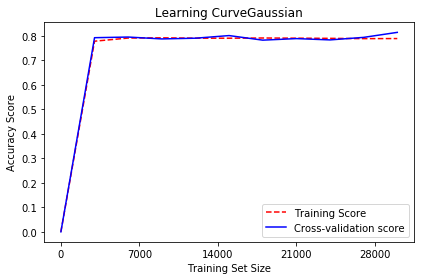

In [59]:
clf = GaussianNB()
name = "Gaussian"
learning_curve(clf_custom_10_g,name)

### Learning Curve of Decision Tree

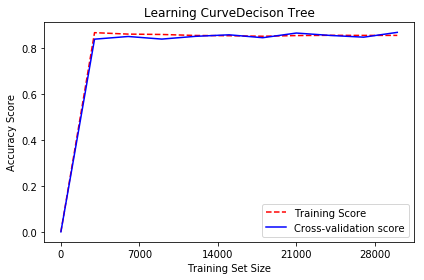

In [61]:
clf = DecisionTreeClassifier(max_leaf_nodes=50, random_state=4,max_depth = 150,criterion = 'entropy')
name = "Decison Tree"
learning_curve(clf,name)

## Learning curve using scikit learn 

[ 2412  7841 13270 18699 24129]
[ 2412  7841 13270 18699 24129]
[ 2412  7841 13270 18699 24129]
[ 2412  7841 13270 18699 24129]


30162

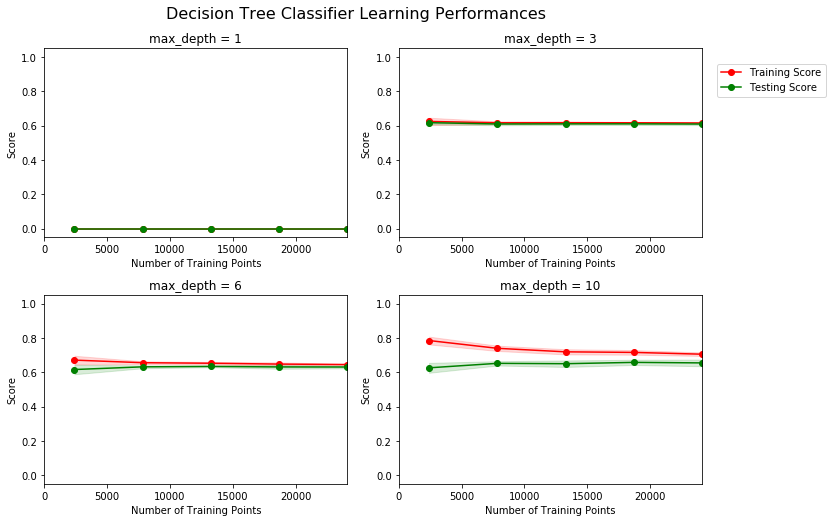

In [62]:
#Learning curve
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    #train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
    
        
        # Create a Decision tree regressor at max_depth = depth
        clf = DecisionTreeClassifier(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(clf, X, y, \
            cv = cv, scoring = 'f1')
        print(sizes)
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Classifier Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
ModelLearning(features_train,labels_train)
len(labels_train)

# TESTING PART

## Preprocessing the test data

In [63]:
#test data loading and preprocessing
from IPython.core.interactiveshell import InteractiveShell
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
#InteractiveShell.ast_node_interactivity = "all"
#load data
test_data = load_data("data/adult_test.csv")

#replace ? with Nan and remove the Nans
test_data = remove_NaN(test_data)

#map income_level with 0 and 1
test_data['Income_level'] = test_data['Income_level'].map({'<=50K.':0, '>50K.':1})

#one hot encoding to remove categorical data
test_data = one_hot_encode(test_data)

test_data['Native Country_Holand-Netherlands'] = 0
features_test = test_data.drop('Income_level', axis = 1)
labels_test = test_data['Income_level']
test_data.head()

Age                 0
WorkClass         963
Fnlwght             0
Education           0
Education-num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Captial Gain        0
Capital Loss        0
Hours-per-week      0
Native Country    274
Income_level        0
dtype: int64


,Age,Fnlwght,Education-num,Captial Gain,Capital Loss,Hours-per-week,Income_level,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,Native Country_Puerto-Rico,Native Country_Scotland,Native Country_South,Native Country_Taiwan,Native Country_Thailand,Native Country_Trinadad&Tobago,Native Country_United-States,Native Country_Vietnam,Native Country_Yugoslavia,Native Country_Holand-Netherlands
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Testing with custom cross validation 

#### Gaussian Naive Bayes

In [64]:
# k = 10
predictions_test = clf_custom_10_g.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,predictions_test))
print("Precision:",precision_score(labels_test,predictions_test))
print("Recall:", recall_score(labels_test,predictions_test))
print("F-score:",fbeta_score(labels_test,predictions_test,beta=1))

Accuracy: 0.788645418327
Precision: 0.647967945049
Recall: 0.305945945946
F-score: 0.415641637599


#### Decision Tree

In [65]:
#k =10
predictions_test = clf_custom_10_dt.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,predictions_test))
print("Precision:",precision_score(labels_test,predictions_test))
print("Recall:", recall_score(labels_test,predictions_test))
print("F-score:",fbeta_score(labels_test,predictions_test,beta=1))

Accuracy: 0.857503320053
Precision: 0.748878923767
Recall: 0.631891891892
F-score: 0.685429492817


#### Gaussian Naive Bayes

In [66]:
# k = 5
predictions_test = clf_custom_5_g.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,predictions_test))
print("Precision:",precision_score(labels_test,predictions_test))
print("Recall:", recall_score(labels_test,predictions_test))
print("F-score:",fbeta_score(labels_test,predictions_test,beta=1))

Accuracy: 0.789243027888
Precision: 0.652375434531
Recall: 0.304324324324
F-score: 0.415038702543


# Decision Tree

In [67]:
#k = 5
predictions_test = clf_custom_5_dt.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,predictions_test))
print("Precision:",precision_score(labels_test,predictions_test))
print("Recall:", recall_score(labels_test,predictions_test))
print("F-score:",fbeta_score(labels_test,predictions_test,beta=1))

Accuracy: 0.852390438247
Precision: 0.723314182038
Recall: 0.646486486486
F-score: 0.682745825603


## Testing with scikit learn's cross validation

#### Naive Bayes

In [68]:
predictions_test = clf_sc_k_g.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,predictions_test))
print("Precision:",precision_score(labels_test,predictions_test))
print("Recall:", recall_score(labels_test,predictions_test))
print("F-score:",fbeta_score(labels_test,predictions_test,beta=1))

Accuracy: 0.789243027888
Precision: 0.652375434531
Recall: 0.304324324324
F-score: 0.415038702543


#### Decision Tree 

In [69]:
predictions_test = clf_sc_k_dt.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,predictions_test))
print("Precision:",precision_score(labels_test,predictions_test))
print("Recall:", recall_score(labels_test,predictions_test))
print("F-score:",fbeta_score(labels_test,predictions_test,beta=1))

Accuracy: 0.854249667995
Precision: 0.735671782023
Recall: 0.634864864865
F-score: 0.681561003917


## Testing with grid search

In [70]:
#Evaluating the DT classifier with grid search validation sets on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
predictions = grid.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,predictions))
print("Precision:",precision_score(labels_test,predictions))
print("Recall:", recall_score(labels_test,predictions))
print("F-score:",fbeta_score(labels_test,predictions,beta=1))

Accuracy: 0.857104913679
Precision: 0.784349742836
Recall: 0.577027027027
F-score: 0.66490189972


## Testing without cross validation or grid search

### Decision Tree

In [71]:
#Evaluating decision tree without cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
 
estimator = DecisionTreeClassifier()
estimator.fit(features_train, labels_train)
pred = estimator.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,pred))
print("Precision:",precision_score(labels_test, pred))
print("Recall:",recall_score(labels_test,pred))
print("F-score:",fbeta_score(labels_test,pred,beta=1))

Accuracy: 0.791235059761
Precision: 0.570630081301
Recall: 0.607027027027
F-score: 0.58826610791


### Gaussian Naive Bayes

In [72]:
#Evaluating Gaussian NB without cross validation
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
 
estimator = GaussianNB()
estimator.fit(features_train, labels_train)
pred = estimator.predict(features_test)
print("Accuracy:",accuracy_score(labels_test,pred))
print("Precision:",precision_score(labels_test, pred))
print("Recall:",recall_score(labels_test,pred))
print("F-score:",fbeta_score(labels_test,pred,beta=1))

Accuracy: 0.788711819389
Precision: 0.648169336384
Recall: 0.306216216216
F-score: 0.415932452276
